In [88]:
%load_ext autoreload
%autoreload 2
% matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [89]:
import pandas as pd
import seaborn as sns
import numpy as np

from tools import make_track, make_ER, ols_regression_PR, ols_regression, lasso_regression
from hc_graph import hc_stock
sns.set()

In [90]:
rate = pd.read_csv(r"financial_data/EUR_rates.csv", index_col=0, parse_dates=True)["3M"]
yahoo = pd.read_csv(r"financial_data/yahoo_prices.csv", index_col=0, parse_dates=True).drop("SP 500", axis=1)
yahoo = yahoo.loc[rate.index[1]:]
bnp = pd.read_csv(r"financial_data/bnp_data.csv", index_col=0, parse_dates=True, dayfirst=True)[['BNPIFEU','BNPIFIT',
                            'BNPIFGE', 'BNPIFFR', 'BNPIFSP']]

prices = make_ER(bnp,rate)
returns = prices.resample("7D").apply(lambda x:x[0]).pct_change().dropna()

In [97]:
sx5e = returns[["BNPIFEU"]]
bch = returns.drop("BNPIFEU", axis=1)

size = 52
freq = 13
bounds = (-np.inf,np.inf)
total_weight = 1
l = 0.05

df_weight = ols_regression(sx5e, bch, size, freq, boundaries=bounds, weight_sum=total_weight)
df_weight_lasso = lasso_regression(sx5e, bch, size, freq, boundaries=bounds, weight_sum=total_weight, l=l)
df_weight_lasso.head()

,BNPIFIT,BNPIFGE,BNPIFFR,BNPIFSP
2008-01-09,2.591726e-01,0.265661,0.352959,0.133601
2008-04-09,1.429728e-01,0.352076,0.350203,0.173088
2008-07-09,1.722862e-07,0.511000,0.503778,0.001774
2008-10-08,1.234243e-01,0.391423,0.305358,0.214844
2009-01-07,3.911204e-07,0.533377,0.473511,0.000004


In [98]:
prices_for_track = prices.loc[df_weight.index[0]:].drop("BNPIFEU", axis=1)
replication = make_track(prices_for_track, df_weight)
replication_lasso = make_track(prices_for_track, df_weight_lasso)

df_res = prices.loc[replication.index][["BNPIFEU"]]
df_res["OLS"] = replication
df_res["Lasso"] = replication_lasso

df_res = df_res / df_res.iloc[0]

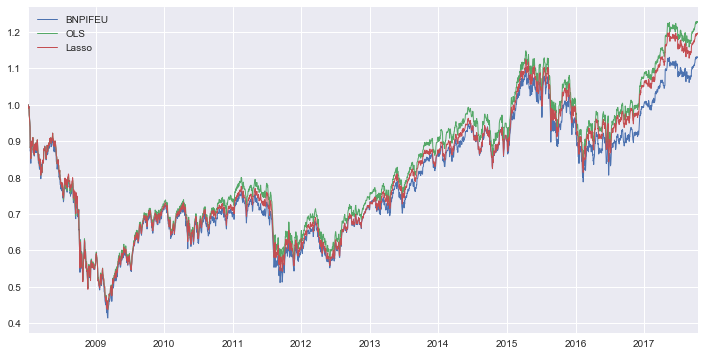

In [99]:
df_res.plot(figsize=(12,6),linewidth=1)